# General Information 

## Research on car sales ads

Performing an analysis for Crankshaft List. Hundreds of free advertisements for vehicles are published on the site every day. We need to study data collected over the last few years and determine which factors influence the price of a vehicle.

In [42]:
#We start by loading the corresponding libraries for the project as well as our data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#loading all the necessary libraries for our project

df = pd.read_csv('/datasets/vehicles_us.csv') #loading the data file into a DataFrame

df.shape #printing the data frame's number of rows and columns

(51525, 13)

## The initial data

Our dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [43]:
df.info() #printing the general/summary information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [44]:
df.head(10) #printing a sample of the data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


## Initial Conclusion

We first identify the following:

- The columns model_year, cylinders, odometer, paint_color, is_4wd all have missing values. Especially the is_4wd column has the most null values

- Additionally, we can notice that some columns have inappropriate data types. More specifically, the date_posted column which is currently an object data type should have been date time data type

- Lastly, we notice that the column is_4wd needs to be converted correctly to Boolean values



Next steps of our data preprocessing stage will include the following:

- Understand and face accordingly missing values 
- Convert columns to their correct data types 
- Replace the condition column with numeric values 

# Data Preprocessing

In [45]:
(df.isnull().sum()/len(df)).round(4) #getting the % of missing values for each column

price           0.0000
model_year      0.0702
model           0.0000
condition       0.0000
cylinders       0.1021
fuel            0.0000
odometer        0.1532
transmission    0.0000
type            0.0000
paint_color     0.1799
is_4wd          0.5037
date_posted     0.0000
days_listed     0.0000
dtype: float64

## The 'price' column

There's nothing to change on the 'price' column since there are no missing values and are in the correct data type (int).

## The 'model_year' column

Since the 'price' column is in good standing will start our data preprocessing phase with the 'model_year' column which is a numerical column (float).  

In [46]:
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Here we will use the median. The model year can be inferred from the model and condition. It's important to note that we can't just replace missing values with the median here because the model_year is dependent on the model and the condition of the vehicle. Thus, we will group our data by 'model' and 'condition' to find the median of each potential combination. Then we will create function which we will apply that median to the missing row. Once our function finds the value that matches that combination then the 'model_year' value will be filled in accordingly all based on the grouped data.

In [47]:
model_year_grouped = df.groupby(['model', 'condition'])['model_year'].median().to_dict()
# grouping our dataframe by model and condition to find the median model_year
# storing the resulting dataframe into a dictionary named model_year_grouped

def model_year_fill (row): 
    #creating a function called model_year_fill that takes a variable 'row' as its argument
    
    if np.isnan(row['model_year']): 
        #if the value of model_year is missing
        
        return model_year_grouped.get((row['model'], row['condition']))
        #returning the median model_year value based on the combination of the model and condition 
    
    return row['model_year']
    #returning the current model_year value if value isn't na

df['model_year'] = df.apply(model_year_fill, axis=1)
#applying the model_year_fill function to the model_year column in our dataframe

df.info() 
#confirming that values have been filled 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51519 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## The 'model' column

There's nothing to change on the 'model' column since there are no missing values and are in the correct data type (object/string).

###### The 'condition' column

Here we don't have any missing values but we have been advised to update to numeric with the following: 


- 'salvage' to 0
- 'fair' to 1 
- 'good' to 2
- 'excellent' to 3
- 'like new' to 4
- 'new' to 5

In [48]:
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In order to replace these values to numeric we will use the where() method.

In [49]:
df['condition'] = df['condition'].where(df['condition'] != 'salvage', 0)
#returning 0 when condition is salvage

df['condition'] = df['condition'].where(df['condition'] != 'fair', 1)
#returning 1 when condition is fair

df['condition'] = df['condition'].where(df['condition'] != 'good', 2)
#returning 2 when condition is good

df['condition'] = df['condition'].where(df['condition'] != 'excellent', 3)
#returning 3 when condition is excellent

df['condition'] = df['condition'].where(df['condition'] != 'like new', 4)
#returning 4 when condition is like new

df['condition'] = df['condition'].where(df['condition'] != 'new', 5)
#returning 5 when condition is new

df['condition'] = df['condition'].astype('int')
#converts the data type to integer

df['condition'].unique()

array([2, 4, 1, 3, 0, 5])

## The 'cylinders' column


Since the 'cylinders' is a numerical column (float) we will call the describe() method to get a first idea of the data.

In [50]:
df['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Here we will follow the same strategy as we did for the 'model_year' column. We will also use the median. The cylinders can be inferred from the model of the vehicle. Thus we will group the data accordingly and then apply it to fill in the missing values. 

In [51]:
cylinders_grouped = df.groupby(['model'])['cylinders'].median().to_dict()
# grouping our dataframe by model to find the median cylinders
# storing the resulting dataframe into a dictionary named cylinders_grouped

def cylinders_fill (row): 
    #creating a function called cylinders_fill that takes a variable 'row' as its argument
    
    if np.isnan(row['cylinders']): 
        #if the value of cylinders is missing
        
        return cylinders_grouped.get(row['model'])
        #returning the median cylinders value based on the model
    
    return row['cylinders']
    #returning the current cylinders value if value isn't na

df['cylinders'] = df.apply(cylinders_fill, axis=1)
#applying the cylinders_fill function to the cylinders column in our dataframe

df.info() 
#confirming that values have been filled 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51519 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int64  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 5.1+ MB


## The 'fuel' column


There's nothing to change on the 'fuel' column since there are no missing values and are in the correct data type (object/string).

## The 'odometer' column


Since the 'odometer' is a numerical column (float) we will call the describe() method to get a first idea of the data.

In [52]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Here we notice a major standard deviation which represents the dispersion of our data. Since the gap is significant we can understand that there are probably lots of outliers and thus we will use the median to fill in missing values. The odometer values (mileage) can be inferred by the model_year and condition so those are the columns in which will group our data by.

In [53]:
odometer_grouped = df.groupby(['model_year', 'condition'])['odometer'].median().to_dict()
# grouping our dataframe by model and condition to find the median value of odometer
# storing the resulting dataframe into a dictionary named odometer_grouped

def odometer_fill (row):
    if np.isnan(row['odometer']):
    #if the value of odometer is missing

        return odometer_grouped.get((row['model_year'], row['condition']))
        #returning the median odometer value based on the model_year and condition

    return row['odometer']
    #returning the current odometer value if value isn't na

df['odometer'] = df.apply(odometer_fill, axis=1)
#applying the odometer_fill function to the odometer column in our dataframe

df.info()
#confirming that values have been filled 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51519 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int64  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51517 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 5.1+ MB


## The 'transmission' column


There's nothing to change on the 'transmission' column since there are no missing values and are in the correct data type (object/string).

## The 'type' column


There's nothing to change on the 'type' column since there are no missing values and are in the correct data type (object/string).

## The 'paint_color' column

This is a unique column because there's nothing that we can use in order to infer what the missing values would have been. Thus, we are accross a big dilemma - should we keep these values as NaN or simply delete the rows? Even though others can have a different view we believe that these rows store extremely important data that would be essential for our analysis and so we will keep them. If we would get rid of these rows (9267 rows to be exact) then our results could be skewered. So will keep it as it is.

In [54]:
df['paint_color'].unique()
#getting the unique values of the column to confirm we don't have any misspelled words

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

## The 'is_4wd' column

This column faces 2 issues, first it has missing values which will have to be filled in and secondly the data should be Boolean type (True/False) which will have to convert with the help of the .where() method. 

In [55]:
df['is_4wd'].unique() 
#printing each unique value in the is_4wd column

array([ 1., nan])

This columns shows whether a car is 4wd (four-wheel drive) or not. The current value 1 stands for True and since there is only one option left that means that nan would be 0 so False as a Boolean data type. Let's fill the value accordingly and the convert to the correct data type. 

In [56]:
df['is_4wd'] = df['is_4wd'].where(df['is_4wd'] == 1, 0)
#returning 0 wherever the value is NOT equal to 1

df['is_4wd'] = df['is_4wd'].astype('bool')
#converting the data type from float to Boolean

df.info()
#confirming that values have been filled and data type changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51519 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int64  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51517 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 4.8+ MB


## The 'date_posted' column

In this column we don't have any missing values but we have to change the data type from object/string to date time data type. First we will study the current dates to understand their current format that we will later need for the data type conversiom.

In [57]:
df['date_posted'].head()

0    2018-06-23
1    2018-10-19
2    2019-02-07
3    2019-03-22
4    2019-04-02
Name: date_posted, dtype: object

After having a look in the data we can understand that the format will be; %Y-%m-%d 

In [58]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51519 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51517 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 4.8+ MB


## The 'days_listed' column

There's nothing to change on the 'days_listed' column since there are no missing values and are in the correct data type (int).

## Adding new columns

We will add the following columns to our table to help us further with our analysis:
    
- Day of the week, month, and year the ad was placed
- The vehicle's age (in years) when the ad was placed
- The vehicle's average mileage per year

In [59]:
df['ad_weekday'] = pd.DatetimeIndex(df['date_posted']).day_name()
#adding a new column that states the day that the ad was published

df['ad_month'] = pd.DatetimeIndex(df['date_posted']).month_name()
#adding a new column that states the month that the ad was published

df['ad_year'] = pd.DatetimeIndex(df['date_posted']).year
#adding a new column that states the year that the ad was published

df['vehicle_age'] = df['ad_year'] - df['model_year']
#adding a new column that states vehicle's age when the ad was published substracting ad_year from the model_year

df['avg_annual_odometer'] = (df['odometer'] / df['vehicle_age']).round(0)
#adding a new column that states vehicle's average annual odometer from dividing odometer by the vehicle_age column
#rounding to the nearest digit point

df.head()
#confirming that columns have been added

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,vehicle_age,avg_annual_odometer
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.0
1,25500,2008.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10.0,8870.0
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.0
3,1500,2003.0,ford f-150,1,8.0,gas,188000.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,11750.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40452.0


## Data Preprocessing Conclusion

We have now cleaned our data and we are ready to start our exploratory data analysis based on reliable data that we can count on. Before moving forward let's quickly summarize all the steps we have taken thus far:

- We replaced the conditions on the condition column with numeric values.
- We have updated all columns to their correct data type (such as column: is_4wd to Boolean and date_psted to datetime.
- We have replaced all missing values with the corresponding median (after first grouping the data according to the each column's conidtion). The only column we didn't replace was the paint_color because we would lose a lot of our data that could eventually ruin our whole analysis - we kept them as it was. 
- Lastly, we added additional columns to our dataset such as the day of the week, month and year the ad was published as well as the vehicle's age and the average annual mileage for each car. 

# Exploratory Data Analysis (EDA)

## Identifying Outliers

Here we will start our exploratory data analysis by plotting histograms for each of the below parameters:
- price
- vehicle's age (when the ad was placed)
- mileage
- number of cylinders
- condition

Our goal here is to study how outliers affect the form and readability of the histograms outliers.

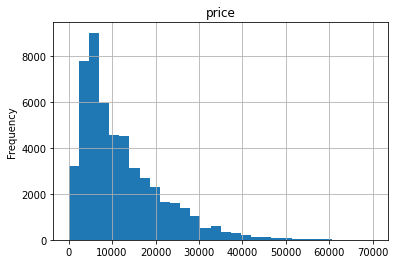

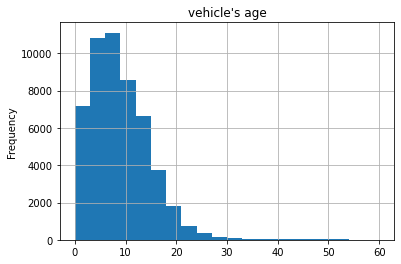

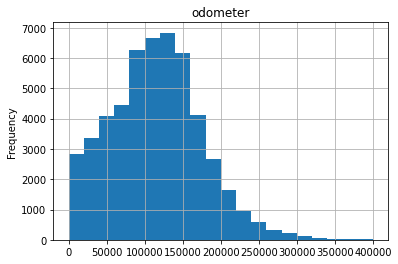

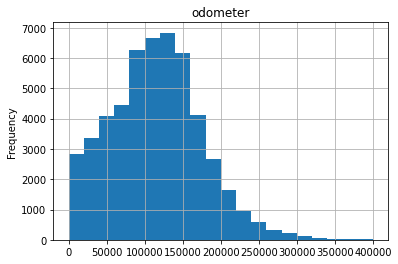

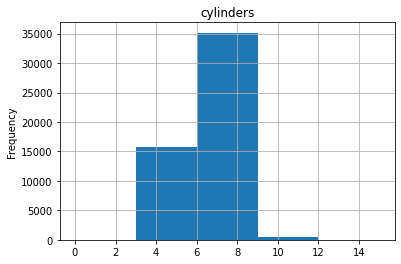

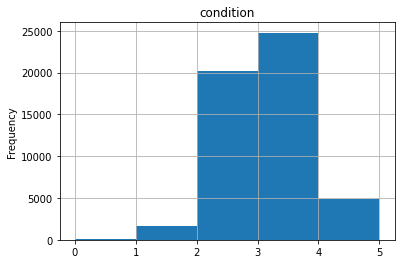

In [60]:
df['price'].plot(kind='hist', bins=30, grid=True, range=(0, 70000))
#plotting a histogram for the price column that has grid, 30 bins, and a range from 0 to 70000

plt.title('price')
#adding a title to our histogram

plt.show()
#showing the histogram


df['vehicle_age'].plot(kind='hist', bins=20, grid=True, range=(0, 60))
#plotting a histogram for the vehicle_age column that has grid, 30 bins, and a range from 0 to 60

plt.title('vehicle\'s age')
#adding a title to our histogram

plt.show()
#showing the histogram


df['odometer'].plot(kind='hist', bins=20, grid=True, range=(0, 400000))
#plotting a histogram for the odometer column that has grid, 30 bins, and a range from 0 to 400000

plt.title('odometer')
#adding a title to our histogram

plt.show()
#showing the histogram


df['odometer'].plot(kind='hist', bins=20, grid=True, range=(0, 400000))
#plotting a histogram for the odometer column that has grid, 30 bins, and a range from 0 to 400000

plt.title('odometer')
#adding a title to our histogram

plt.show()
#showing the histogram


df['cylinders'].plot(kind='hist', bins=5, grid=True, range=(0, 15))
#plotting a histogram for the cylinders column that has grid, 5 bins, and a range from 0 to 15

plt.title('cylinders')
#adding a title to our histogram

plt.show()
#showing the histogram


df['condition'].plot(kind='hist', bins=5, grid=True, range=(0, 5))
#plotting a histogram for the condition column that has grid, 5 bins, and a range from 0 to 5

plt.title('condition')
#adding a title to our histogram

plt.show()
#showing the histogram

First, in our price histogram we notice that our data starts to zero out after 40000. In the vehicle's age  this happens after 30. In the odometer histogram this can be seen after 300000. In the last two histograms cyliners and condition we can't really identify any outliers. 

## Filtering Data & Updated Histograms

In [61]:
outlier_df = df[(df['price'] > 40000) & (df['vehicle_age'] > 30) & (df['odometer'] > 300000)]
#creating a new dataframe where we only include the outliers 

outlier_df.info()
#printing the info of this new dataframe

outlier_df
#printing the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 17869 to 17869
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                1 non-null      int64         
 1   model_year           1 non-null      float64       
 2   model                1 non-null      object        
 3   condition            1 non-null      int64         
 4   cylinders            1 non-null      float64       
 5   fuel                 1 non-null      object        
 6   odometer             1 non-null      float64       
 7   transmission         1 non-null      object        
 8   type                 1 non-null      object        
 9   paint_color          1 non-null      object        
 10  is_4wd               1 non-null      bool          
 11  date_posted          1 non-null      datetime64[ns]
 12  days_listed          1 non-null      int64         
 13  ad_weekday           1 non-null

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,vehicle_age,avg_annual_odometer
17869,59900,1964.0,chevrolet corvette,4,8.0,gas,990000.0,automatic,convertible,red,False,2018-06-17,28,Sunday,June,2018,54.0,18333.0


Now that we have succesfully created a dataframe with our outliers, which appears to just be one we will also need to create a new dataframe that will have no outliers at all - our filtered dataframe. 

This filtered dataframe will be the one we will work with moving forward. 

In [62]:
filtered_df = df[(df['price'] < 40000) & (df['vehicle_age'] < 30) & (df['odometer'] < 300000)]
#creating a new dataframe where we don't have outliers - filtered data

filtered_df.info()
#printing the info of the filtered dataframe

filtered_df.head()
#printing the first 5 rows of our dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50092 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                50092 non-null  int64         
 1   model_year           50092 non-null  float64       
 2   model                50092 non-null  object        
 3   condition            50092 non-null  int64         
 4   cylinders            50092 non-null  float64       
 5   fuel                 50092 non-null  object        
 6   odometer             50092 non-null  float64       
 7   transmission         50092 non-null  object        
 8   type                 50092 non-null  object        
 9   paint_color          41064 non-null  object        
 10  is_4wd               50092 non-null  bool          
 11  date_posted          50092 non-null  datetime64[ns]
 12  days_listed          50092 non-null  int64         
 13  ad_weekday           50092 non-

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,vehicle_age,avg_annual_odometer
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.0
1,25500,2008.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10.0,8870.0
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.0
3,1500,2003.0,ford f-150,1,8.0,gas,188000.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,11750.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40452.0


Since we now have filtered the data let's plot new histograms with the exact same parameters as we did before.

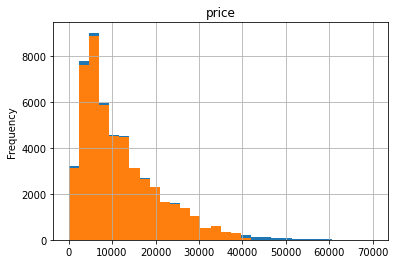

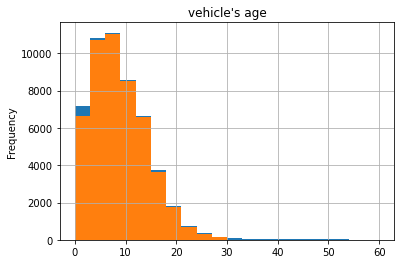

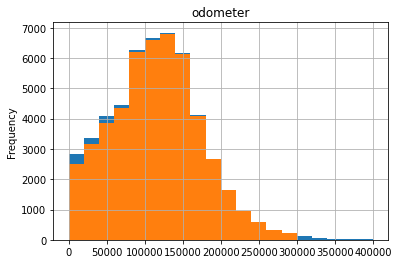

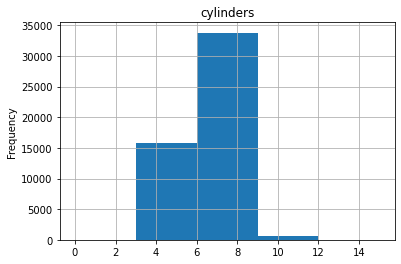

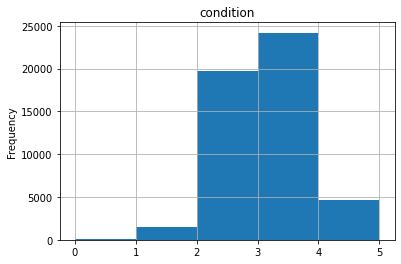

In [63]:
df['price'].plot(kind='hist', bins=30, grid=True, range=(0, 70000))
#plotting a histogram for the price column that has grid, 30 bins, and a range from 0 to 70000

filtered_df['price'].plot(kind='hist', bins=30, grid=True, range=(0, 70000))
#plotting a histogram for the price column that has grid, 30 bins, and a range from 0 to 70000

plt.title('price')
#adding a title to our histogram

plt.show()
#showing the histogram


df['vehicle_age'].plot(kind='hist', bins=20, grid=True, range=(0, 60))
#plotting a histogram for the vehicle_age column that has grid, 30 bins, and a range from 0 to 60

filtered_df['vehicle_age'].plot(kind='hist', bins=20, grid=True, range=(0, 60))
#plotting a histogram for the vehicle_age column that has grid, 30 bins, and a range from 0 to 60

plt.title('vehicle\'s age')
#adding a title to our histogram

plt.show()
#showing the histogram


df['odometer'].plot(kind='hist', bins=20, grid=True, range=(0, 400000))
#plotting a histogram for the odometer column that has grid, 30 bins, and a range from 0 to 400000

filtered_df['odometer'].plot(kind='hist', bins=20, grid=True, range=(0, 400000))
#plotting a histogram for the odometer column that has grid, 30 bins, and a range from 0 to 400000

plt.title('odometer')
#adding a title to our histogram

plt.show()
#showing the histogram


filtered_df['cylinders'].plot(kind='hist', bins=5, grid=True, range=(0, 15))
#plotting a histogram for the cylinders column that has grid, 5 bins, and a range from 0 to 15

plt.title('cylinders')
#adding a title to our histogram

plt.show()
#showing the histogram


filtered_df['condition'].plot(kind='hist', bins=5, grid=True, range=(0, 5))
#plotting a histogram for the condition column that has grid, 5 bins, and a range from 0 to 5

plt.title('condition')
#adding a title to our histogram

plt.show()
#showing the histogram

In the histograms above the orange color represents the filtered data and the blue color represents the raw data. It helps seeing both graphs combined because their differences stand out. 

- First, at the price histograph we see that data have remained quite the same with minor differences. The most interesting part is that even though there's a continous decrease after 6000 there is a small spike again at around 35000. 

- Secondly, we notice that at the vehicle's age histograph there's 3-9 spike (approximately) and then starts to periodically decrease. 

- Lastly, in the updated odometer historgaph we notice a spike at around 100000-140000 quite similar to our first histograph. What is interesting in this one is the fact that our filtered data overall has less mileage compared to our raw data (0-75000).

## Investigating days_listed

count    50092.000000
mean        39.546814
std         28.219892
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

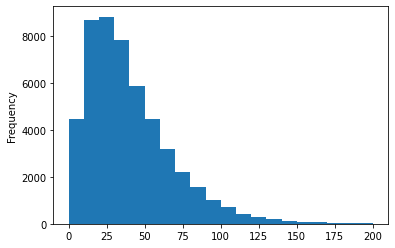

In [64]:
filtered_df['days_listed'].plot(kind='hist', bins=20, range=(0,200))
#plotting a histogram for the days_listed column that has 20 bins, and a range from 0 to 200

filtered_df['days_listed'].describe()
#getting quartile and median values for days_listed column

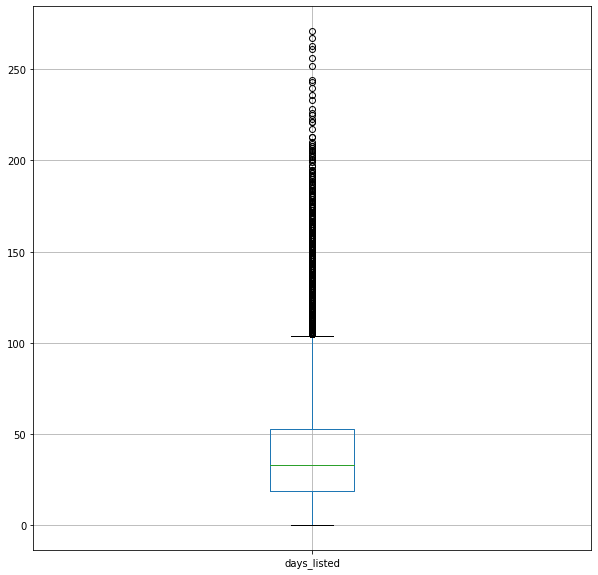

In [65]:
filtered_df.boxplot(column='days_listed', figsize=(10,10))
#plotting a boxplot for the days_listed column that has size 10 x 10 inches

plt.show()
#showing the boxplot

We can conclude that a typical ad lasts between 19 and 53 days. The mean was found to be 40 and the median 33, which means that most ads stay online for approximately 33 days. Any ad that would be taken down within 19 days would be considered quick and anything that would last more than 100 days would be considered long. 

## Analyzing the number of ads and the average price for each vehicle type

We will create two tables:

- A pivot table that will group by vehicle type and find the average price for each. We won't use the aggfunc paremeter since the pivot_table method calculates the mean by default.

- A table that will list the number of ads per vehicle type.

In [66]:
vehicle_type_price_stat = filtered_df.pivot_table(index='type', values='price')
#creating a pivot table for the vehicle types based on the average price 
#by deafult the pivot_table calculates the average 

vehicle_type_price_stat
#printing the pivot table

,price
type,
SUV,10701.714579
bus,17135.666667
convertible,12474.605744
coupe,13615.978500
hatchback,6814.221248
mini-van,8043.616984
offroad,13804.640777
other,10649.663968
pickup,15521.425361


In [67]:
ads_per_vehicle_type = filtered_df['type'].value_counts()
#creating a second table that shows the number of ads for each vehicle type

ads_per_vehicle_type
#printing the ads_per_vehicle_type table

SUV            12182
sedan          12100
truck          11805
pickup          6719
coupe           2093
wagon           1527
mini-van        1154
hatchback       1026
van              626
convertible      383
other            247
offroad          206
bus               24
Name: type, dtype: int64

Now we can join the two tables that we created above since are both based on 'type' and then we will rename the columns to sort them in a descending order so that we will be able to identify the two types of vehicles that have the most ads. 

In [68]:
combined_table = vehicle_type_price_stat.join(ads_per_vehicle_type)
#combining the two tables we previously made with the join() method

combined_table.columns = ['avg price per vehicle type', 'ads per vehicle type']
#renaming the column titles to be more clear

combined_table = combined_table.sort_values('ads per vehicle type', ascending = False)
#sorting the table on a descending order based on 'ads per vehicle type' column

combined_table
#printing the table 

,avg price per vehicle type,ads per vehicle type
type,,
SUV,10701.714579,12182
sedan,6949.626860,12100
truck,15771.432020,11805
pickup,15521.425361,6719
coupe,13615.978500,2093
wagon,9013.490504,1527
mini-van,8043.616984,1154
hatchback,6814.221248,1026
van,10517.514377,626


Based on the number of ads per vehicle type we can conclude that SUV and sedan are the ones that have the most ads published for (most popular out of all types).

## What factors impact the price the most?

### Price & SUV Vehicles Analysis

In [69]:
filtered_df_suv = filtered_df[filtered_df['type'] == 'SUV']
#filtering a new dataset that has only SUVs since that was our most popular type of vehicle

filtered_df_suv = filtered_df_suv[['price', 'vehicle_age', 'odometer', 'condition', 'transmission', 'paint_color']]
#selecting the columns that would like to keep on our new dataset

print(filtered_df_suv.head())
#printing the first 5 rows of our SUV filtered dataset

    price  vehicle_age  odometer  condition transmission paint_color
0    9400          7.0  145000.0          2    automatic         NaN
7   15990          6.0  109473.0          3    automatic       black
8   11500          6.0  104174.0          3    automatic         NaN
9    9200         11.0  147191.0          3    automatic        blue
14  12990         10.0  132285.0          3    automatic       black


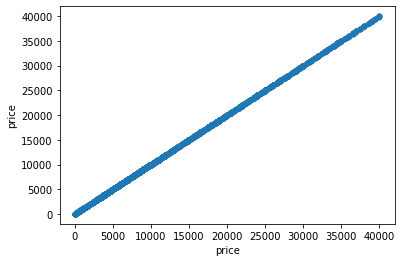

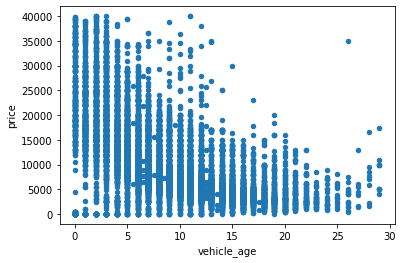

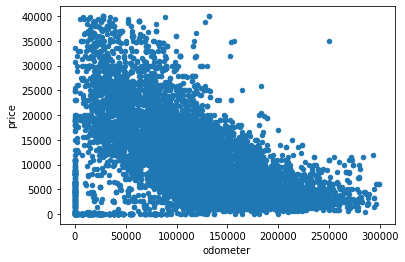

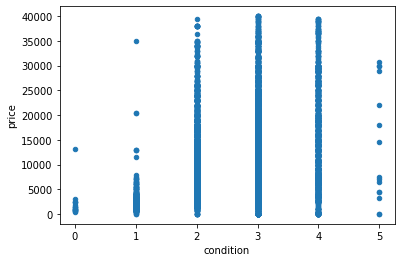

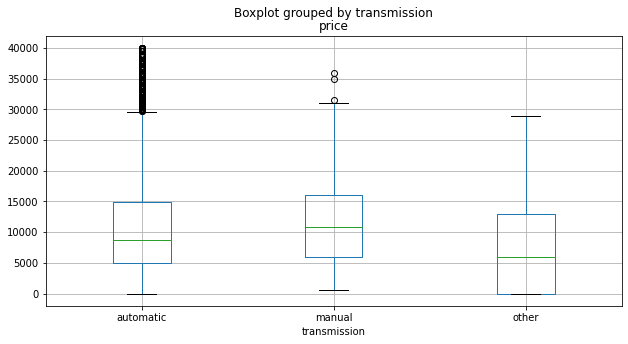

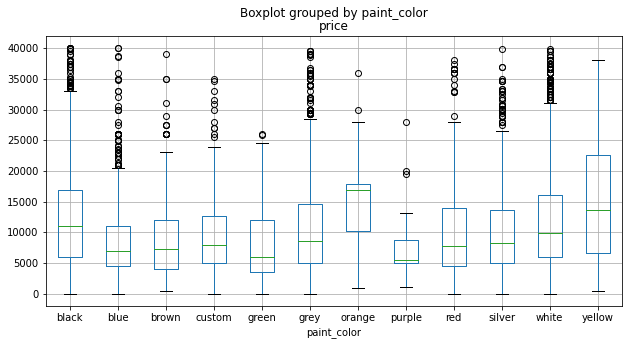

In [70]:
for column in filtered_df_suv.columns:
    #here we are creating a for loop for automation for the suv vehicles
    if (column == 'transmission')|(column == 'paint_color'):
        #if the column is either transmission or paint_color a boxplot will be made
        filtered_df_suv.boxplot(column='price', by=column, figsize=(10,5))
        plt.show()
        
    else:
        #for all other columns a scatter plot will be made
        filtered_df_suv.plot(x=column, y='price', kind='scatter')
        plt.show()

On our quantitative columns we can see that there's moderate negative correlation with both the vehicle's age and the odometer. On the other hand on our categorical columns (transmission and paint_color) we don't see any real correlation. Only comment that can be made here is that the cars with color yellow have more chances being pricey.


Below we will also create a correlation matrix by using the corr() method to confirm the above conclusions. Anything either close to 1 (positive correlation) or close to -1 (negative correlation) would mean that there's a strong correlation within that value and price. 

In [71]:
filtered_df_suv.corr()
#creating a correlation matrix

,price,vehicle_age,odometer,condition
price,1.000000,-0.575413,-0.533358,0.275811
vehicle_age,-0.575413,1.000000,0.632157,-0.344917
odometer,-0.533358,0.632157,1.000000,-0.354166
condition,0.275811,-0.344917,-0.354166,1.000000


#### Conclusion for Price & SUV Vehicles 

On our quantitative columns we can see that there's moderate negative correlation with both the vehicle's age (-0.57) and the odometer (-0.53). Lastly, there's a weak positive correlation between price and condtion (just 0.27). 

On our categorical columns (transmission and paint_color) we don't see any real correlation.

### Price & Sedan Vehicles Analysis

In [72]:
filtered_df_sedan = filtered_df[filtered_df['type'] == 'sedan']
#filtering a new dataset that has only sedans since that was our most popular type of vehicle

filtered_df_sedan = filtered_df_sedan[['price', 'vehicle_age', 'odometer', 'condition', 'transmission', 'paint_color']]
#selecting the columns that would like to keep on our new dataset

print(filtered_df_sedan.head())
#printing the first 5 rows of our sedan filtered dataset

    price  vehicle_age  odometer  condition transmission paint_color
2    5500          6.0  110000.0          4    automatic         red
4   14900          2.0   80903.0          3    automatic       black
5   14990          4.0   57954.0          3    automatic       black
6   12990          3.0   79212.0          3    automatic       white
11   8990          7.0  111142.0          3    automatic        grey


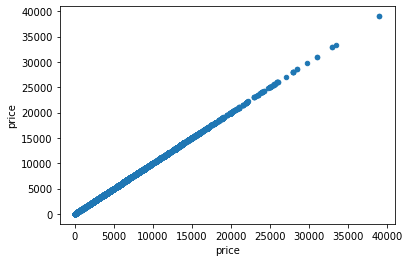

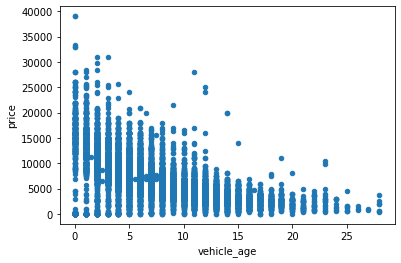

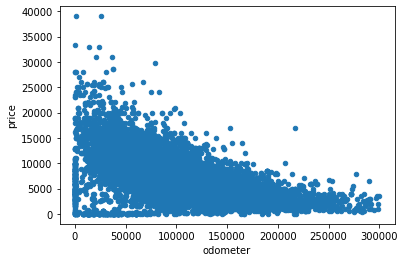

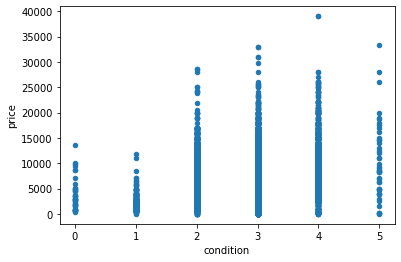

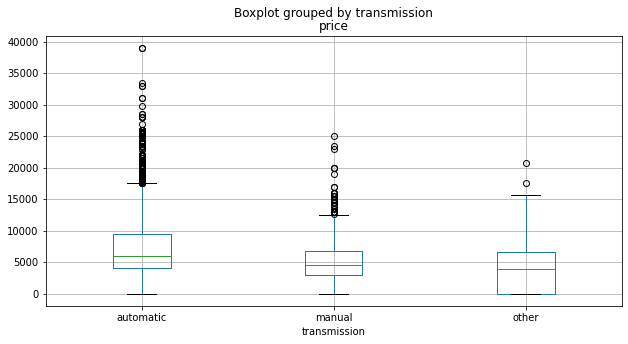

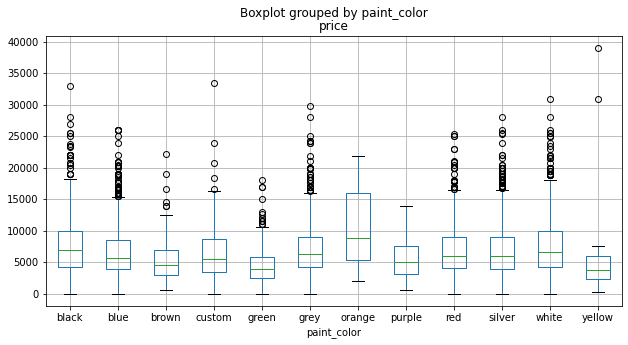

In [73]:
for column in filtered_df_sedan.columns:
    #here we are creating a for loop for automation for the sedan vehicles
    if (column == 'transmission')|(column == 'paint_color'):
        #if the column is either transmission or paint_color a boxplot will be made
        filtered_df_sedan.boxplot(column='price', by=column, figsize=(10,5))
        plt.show()
        
    else:
        #for all other columns a scatter plot will be made
        filtered_df_sedan.plot(x=column, y='price', kind='scatter')
        plt.show()

In [74]:
filtered_df_sedan.corr()

,price,vehicle_age,odometer,condition
price,1.000000,-0.619385,-0.564645,0.298919
vehicle_age,-0.619385,1.000000,0.630157,-0.325618
odometer,-0.564645,0.630157,1.000000,-0.349009
condition,0.298919,-0.325618,-0.349009,1.000000


#### Conclusion for Price & Sedan Vehicles 

On our quantitative columns we can see that there's moderate negative correlation with both the vehicle's age (-0.62) and the odometer (-0.56). Lastly, there's a weak positive correlation between price and condtion (just 0.28). Sedans have a stronger negative correlation with price and vehicle's age than the SUV vehicles. 

On our categorical columns (transmission and paint_color) we don't see any real correlation. Only comment that can be made here is that the cars with color orange have more chances being pricey. On SUVs we made a similar comment but for the yellow color. It's interesting to see how the colors and type of vehicles can affect price.

# Overall Conclusion

In our project we plotted histograms we removed outliers and also filtered data. We identified that most ads last between 19-50 days and those lasting either less than 19 or more than 100 are pretty rare. Additionally, we explored the two most popular vehicle types (SUVs and Sedans) and we investigated further our analysis by looking at these two in more detail. More specifically we looked at these two popular vehicles and found their correlation with price, vehicle's age, odometer, condition, transmission and paint accordingly. Both vehicles have a moderate negative correlation between price and vehicle's age as well as with vehicle's odometer.